What image do you want? tree


https://www.google.com/search?q=tree&tbm=isch
----End of HTML----
Read 23 images


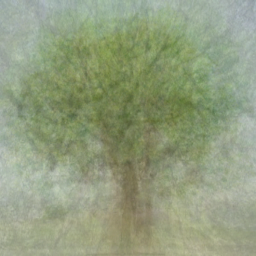

In [19]:
from PIL import Image
#import cv2
import base64
import io
import numpy as np
#from IPython.display import Image 


from urllib.request import urlopen, Request

# Take in base64 string and return cv image
def stringToImage(base64_string):
    imgdata = base64.b64decode(str(base64_string))
    image = Image.open(io.BytesIO(imgdata))
    return image
    #return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)

item = input("What image do you want?")

agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36'
#agent =  'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'
#agent = 'Mozilla/5.0 (iPhone; CPU iPhone OS 10_3 like Mac OS X) AppleWebKit/602.1.50 (KHTML, like Gecko) CriOS/56.0.2924.75 Mobile/14E5239e Safari/602.1'

headers = {'User-Agent': agent}
reg_url = 'https://www.google.com/search?q='+item+'&tbm=isch'
print(reg_url)
req = Request(url=reg_url, headers=headers) 
html = str(urlopen(req).read())
html = html.replace("\\\\","\\");
#print(html)
i=0
#imgs=[]

#mergeddata = np.zeros([256,256,4], dtype=np.float)

N=0

for n in range(0,100):
  imtype="jpeg"
  #imtype="png"
  i = html.find("'data:image\\/"+imtype,i);
  if i==-1:
     print("----End of HTML----")
     break
  i2 = html.find("'",i+18+len(imtype));
  #print("Reading image "+str(n+1)+"  "+str(i)+" to "+str(i2))
  s = html[i+21+len(imtype):i2-1];
  s= s.replace("\\/","/");
  try:
    image = stringToImage(s)
    image = image.resize([256,256])
    #image.show()
    #imgs.append(image)
    if N==0:
       mergeimage = image
    else:
       mergeimage =  Image.blend(mergeimage,image ,1.0/(N+1)) 
       
    N=N+1
    #print(s);
  except:
    pass
    #print("<<Image failed>>")    
    #print(s);
  i=i2
print("Read "+str(N)+" images")
display(mergeimage)